# Lead Scoring Case Study

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### The steps are broadly:

1. Reading and Understanding the Data
2. Visualising the Data
3. Preparation of Data for Modeling
4. Splitting the Data into Training and Testing Sets
5. Model Building
6. Model Evaluation

## Step 1: Reading and Understanding the Data

In [141]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [142]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Import the Machine Learning libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

###  Read the data from csv file
 

**Note:- Please change the reading directory of the dataset as per your requirement.**   
 
 
> - **Leads.csv** as current file name 

In [144]:
leads = pd.read_csv(r'C:\Users\gohel\OneDrive\Desktop\UpGrad\Courses\Portal Files\Course 2 - Machine Learning--1\Module 7 - Lead Scoring Case Study\Lead Scoring Assignment\leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Understand the Data

In [145]:
# Check the number of rows and columns in the dataframe

leads.shape

(9240, 37)

In [146]:
# Checking the size of the dataframe

leads.size

341880

In [147]:
# Checking data type of the dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Approach:**
 - **This helps to give a good idea of the dataframes.**

In [148]:
# Checking the summuary of the Numerical column in the dataframe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [149]:
# checking the null values in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [150]:
# Droping the columns that are having a null values above 40% 

leads = leads.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [151]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Approach:**
 - **We have dropped the null values greater than 40%.**

### Checking the Duplicate values

In [152]:
# Checking Duplicate value in Prospect ID

sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [153]:
# Checking Duplicate value in Lead Number

sum(leads.duplicated(subset = 'Lead Number')) == 0

True

**Approach:**
 - **We can drop the 'Prospect ID' & 'Lead Number' column as they are redundant columns and not containing any duplicate values.**

In [154]:
leads = leads.drop(['Prospect ID','Lead Number'],axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [155]:
# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in leads.columns[2:]:
    print(col.upper(), end=': ')
    print(leads[col].unique())
    print("---------------------------------------------------------------------------------------------------------------")

DO NOT EMAIL: ['No' 'Yes']
---------------------------------------------------------------------------------------------------------------
DO NOT CALL: ['No' 'Yes']
---------------------------------------------------------------------------------------------------------------
CONVERTED: [0 1]
---------------------------------------------------------------------------------------------------------------
TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
---------------------------------------------------------------------------------------------------------------
TOTAL TIME SPENT ON WEBSITE: [   0  674 1532 ...  603  483  927]
---------------------------------------------------------------------------------------------------------------
PAGE VIEWS PER VISIT: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    

In [156]:
# Checking unique values in the dataframe

leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

**Approach:**
 - **The following inconsistencies have been observed in the above unique entires of each column:**
                          
     - Many columns exist with only a single category (Redundant columns).
     - Due to a mismatch in cases, the same category is perceived as different. (ex. Google -> google)
     - The value Select is equivalent to NaN (Since it means no option is selected).

In [157]:
# Converting all the values to lower case

leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [158]:
# Replacing 'select' with NaN

leads = leads.replace('select',np.nan)

In [159]:
# Dropping unique valued columns

leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,no,no,no,no,no,interested in other courses,NaN,NaN,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,ringing,NaN,NaN,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,will revert after reading the email,potential lead,mumbai,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,ringing,NaN,mumbai,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,will revert after reading the email,NaN,mumbai,no,modified


In [160]:
leads.shape

(9240, 25)

In [161]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [162]:
# Again Droping the columns that are having a null values above 40% 

leads = leads.drop(['How did you hear about X Education','Lead Profile'],axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,no,no,no,no,no,no,interested in other courses,NaN,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,no,ringing,NaN,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,no,ringing,mumbai,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified


In [163]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Categorical Analysis:

In [164]:
# Checking the value counts of 'city' column

leads['City'].value_counts(dropna=False)

NaN                            3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

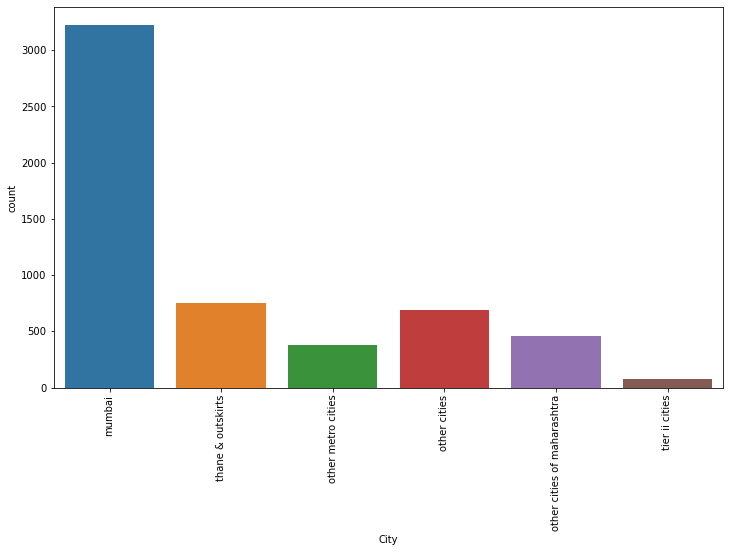

In [165]:
# Plotting the count plot for 'city' column 

plt.figure(figsize = (12,7))
city = sns.countplot(leads.City)
city.set_xticklabels(city.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the above data, we can see that there more missing values, so we will drop this column.**

In [166]:
leads = leads.drop(['City'],axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,better career prospects,no,no,no,no,no,no,interested in other courses,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,better career prospects,no,no,no,no,no,no,ringing,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,better career prospects,no,no,no,no,no,no,will revert after reading the email,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,better career prospects,no,no,no,no,no,no,ringing,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,better career prospects,no,no,no,no,no,no,will revert after reading the email,no,modified


In [167]:
# Checking the value counts of 'Specialization' column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

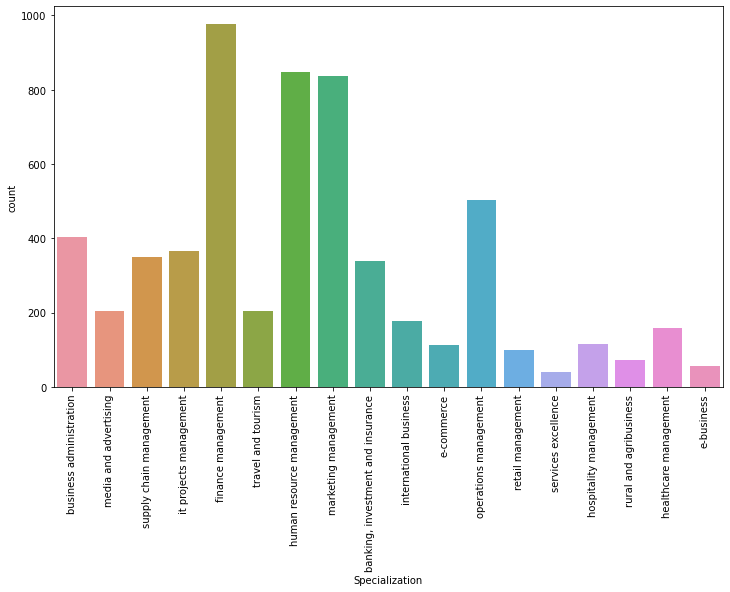

In [168]:
# Plotting the count plot for 'Specialization' column 

plt.figure(figsize = (12,7))
Specialization = sns.countplot(leads.Specialization)
Specialization.set_xticklabels(Specialization.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the above graph, we are unable to say that which Specialization is dominating, so we can replace the null values with 'Unspecified'.**

In [169]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unspecified')

In [170]:
# Checking the value counts of 'What is your current occupation' column

leads['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

**Approach:**
 - **From the Data, we can see that most entries are unemployed, so we can change the NaN value with 'unemployed'.**

In [171]:
leads['What is your current occupation'] = leads['Specialization'].replace(np.nan, 'unemployed')

In [172]:
# Checking the value counts of 'Country' column

leads['Country'].value_counts(dropna=False)

india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

**Approach:**
 - **From the Data, we can see that most entries are india, so we can replace the NaN value with 'india'.**

In [173]:
leads['Country'] = leads['Country'].replace(np.nan, 'india')

In [174]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [175]:
# Checking the value counts of 'What matters most to you in choosing a course' column

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Approach:**
 - **From the Data, we can see that most entries as better career prospects, thus we will impute the missing value as 'better career prospects'.**

In [176]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'better career prospects')

In [177]:
# Checking the value counts of 'Tags' column

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

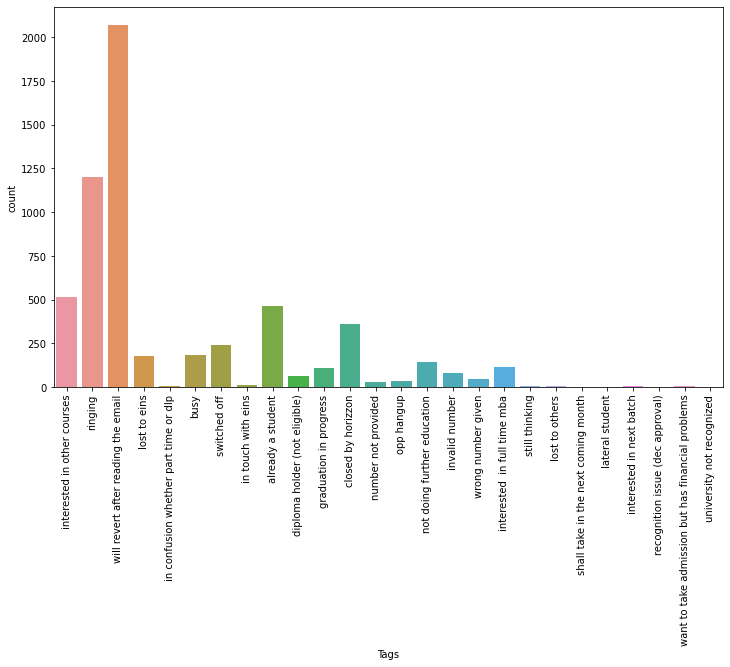

In [178]:
# Plotting the count plot for 'Tags' column 

plt.figure(figsize = (12,7))
Tags = sns.countplot(leads.Tags)
Tags.set_xticklabels(Tags.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the above data, we can see that there more missing values, so we will drop this column.**

In [179]:
leads = leads.drop(['Tags'],axis=1)

In [180]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [181]:
# Checking the percent of lose if the null values are removed

round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

**Approach:**
 - **By checking the percent of lose if the null values are removed is 1.48. we can drop them as the value is very less.**

In [182]:
leads.dropna(inplace=True)

In [183]:
# checking the null values again in the dataframe

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [184]:
# To see the value counts of all categorical values

for columns in leads:
    print(leads[columns].astype('category').value_counts())
    print("--------------------------------------------------------------------------------------------------")

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
--------------------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
live chat               2
press_release           2
social media            2
welearn                 1
welearnblog_home        1
pay per click ads       1
testone                 1
blog                    1
nc_edm                  1
youtubechannel          1
Name: Lead Source, dtype: int64
--------------------------------------------------------------------------------------------------
no     8358
yes     716
Name: Do Not Email, dtype: int64
---------------------------------

## Step 2: Visualising the Data

- As mentioned in Insruction the target variable, in this case, is the column **‘Converted’** which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.     

### Univariate Analysis:

In [185]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [186]:
# Checking the value counts of 'Lead Source' column

leads['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [187]:
leads['Lead Source'] =leads['Lead Source'].replace(['facebook','bing','youtubechannel','social media','press_release',
                                                    'pay per click ads','testone',
                                                     'nc_edm','welearnblog_home',
                                                     'welearn','blog','click2call',
                                                    'press_release','live chat'],'others')    

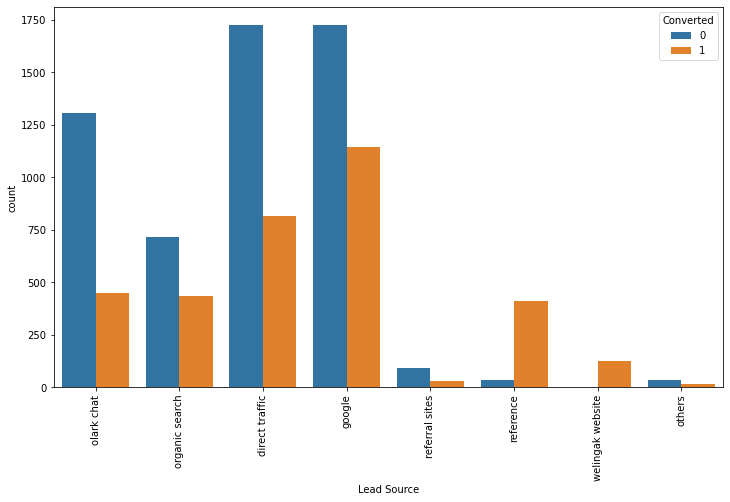

In [188]:
# Plotting the count plot for 'Lead Source' column 

plt.figure(figsize = (12,7))
Lead_Source = sns.countplot(leads['Lead Source'],hue = "Converted", data = leads)
Lead_Source.set_xticklabels(Lead_Source.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the graph, we can say that 'direct traffic' and 'Google' convert the maximum number of leads.**
 - **The rate of conversion is high for the 'welingak website' and 'reference'.**
 - **Other Sources have a considerable amount of conversions.**

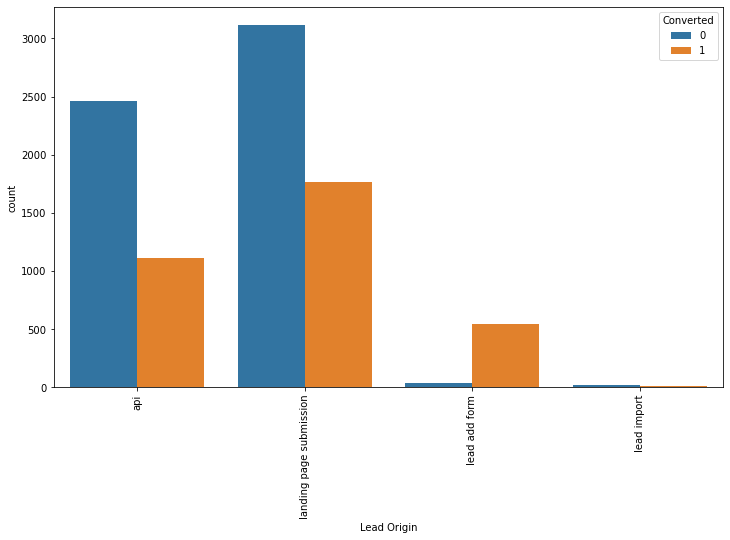

In [189]:
# Plotting the count plot for 'Lead Origin' column 

plt.figure(figsize = (12,7))
Lead_Origin = sns.countplot(leads['Lead Origin'],hue = "Converted", data = leads)
Lead_Origin.set_xticklabels(Lead_Origin.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the graph, we can see that 'lead import' count is minimum.**
 - **The most conversions came from the 'landing page submission', followed by the 'api'.**
 - **The 'lead add form' conversion rate is good, but the counts are very low.**

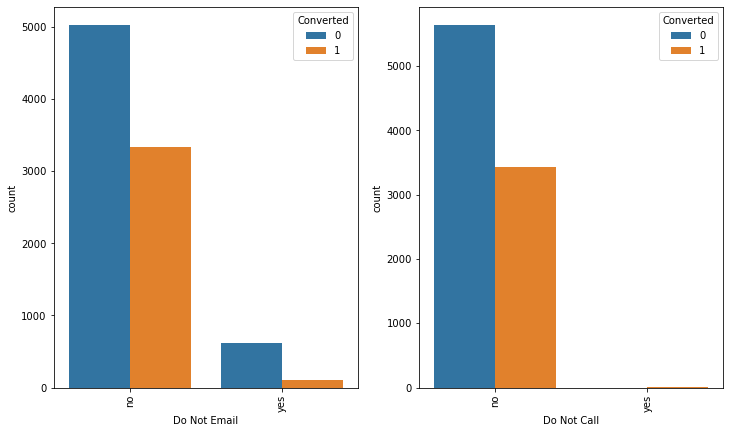

In [190]:
# Plotting the count plot for 'Do Not Email' and 'Do Not Call' column 

plt.figure(figsize = (12,7))

axis1=plt.subplot(1, 2, 1)
Do_Not_Email =sns.countplot(leads['Do Not Email'],hue = "Converted", data = leads)
Do_Not_Email.set_xticklabels(Do_Not_Email.get_xticklabels(),rotation = 90)

axis2 = plt.subplot(1, 2, 2)
Do_Not_Call = sns.countplot(leads['Do Not Call'],hue = "Converted", data = leads)
Do_Not_Call.set_xticklabels(Do_Not_Call.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **Do Not Email**
    - **The overall count of 'yes' is very low and among them majority of them are not converted.**
    - **The leads who choose 'no' is very high compared to the overall count of 'yes'.**
 - **DO NOT CALL**
    - **There are no leads who has selected 'yes' as a option.**
    - **Votes are significantly high for 'no', with most of the counts not being converted, but half of them have been converted.**
    

 - **Thus, we can say that both columns don't give much relavent information and can drop 'Do Not E-mail' and 'Do Not Call' columns.**

In [191]:
leads=leads.drop(['Do Not Email','Do Not Call'],axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0.0,0,0.0,page visited on website,india,Unspecified,Unspecified,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,0,5.0,674,2.5,email opened,india,Unspecified,Unspecified,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,india,business administration,business administration,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,india,media and advertising,media and advertising,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,india,Unspecified,Unspecified,better career prospects,no,no,no,no,no,no,no,modified


In [192]:
# Checking the summuary of 'TotalVisits' column

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

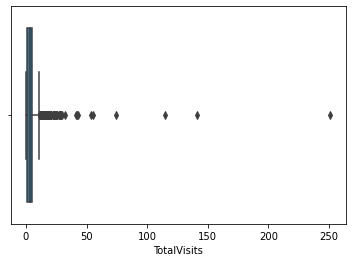

In [193]:
# plotting the box plot for 'TotalVisits' column

sns.boxplot(leads['TotalVisits'])
plt.show()

**Approach:**
 - **From the above box plot, we can see that there are many outliers and thus we can cap the outliers at 95% for analysis.**

In [194]:
caped = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= caped[0]] = caped[0]
leads['TotalVisits'][leads['TotalVisits'] >= caped[1]] = caped[1]

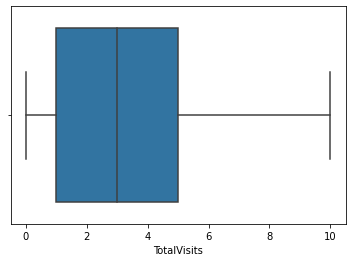

In [195]:
# plotting the box plot for 'TotalVisits' column

sns.boxplot(leads['TotalVisits'])
plt.show()

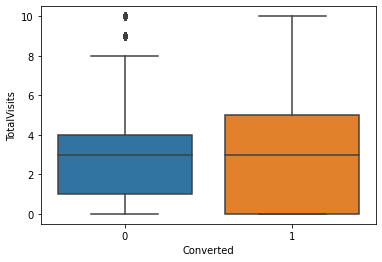

In [196]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [197]:
# Checking the summuary of 'Total Time Spent on Website' column

leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

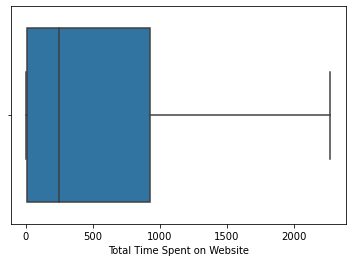

In [198]:
# plotting the box plot for 'Total Time Spent on Website' column

sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

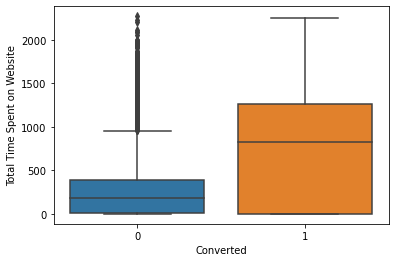

In [199]:
sns.boxplot(y ='Total Time Spent on Website', x ='Converted', data = leads)
plt.show()

In [200]:
# Checking the summuary of 'Page Views Per Visit' column

leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

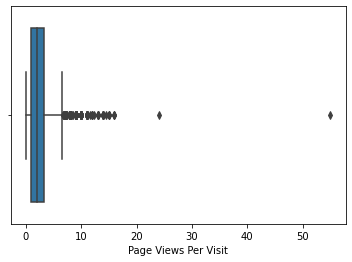

In [201]:
# plotting the box plot for 'Page Views Per Visit' column

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

**Approach:**
 - **Based on the box plot above, we can see that there are many outliers, which we can cap at 95%.**

In [202]:
caped = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= caped[0]] = caped[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= caped[1]] = caped[1]

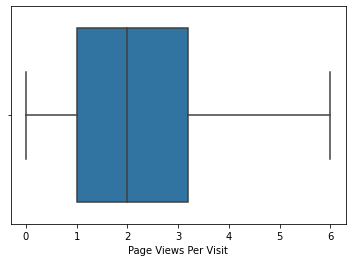

In [203]:
# plotting the box plot for 'Page Views Per Visit' column

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

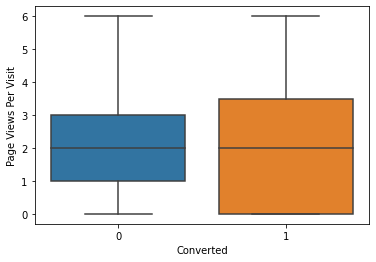

In [204]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads)
plt.show()

In [205]:
# Checking the value counts of 'Last Activity' column

leads['Last Activity'].value_counts(dropna=False)

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
unreachable                       90
unsubscribed                      59
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

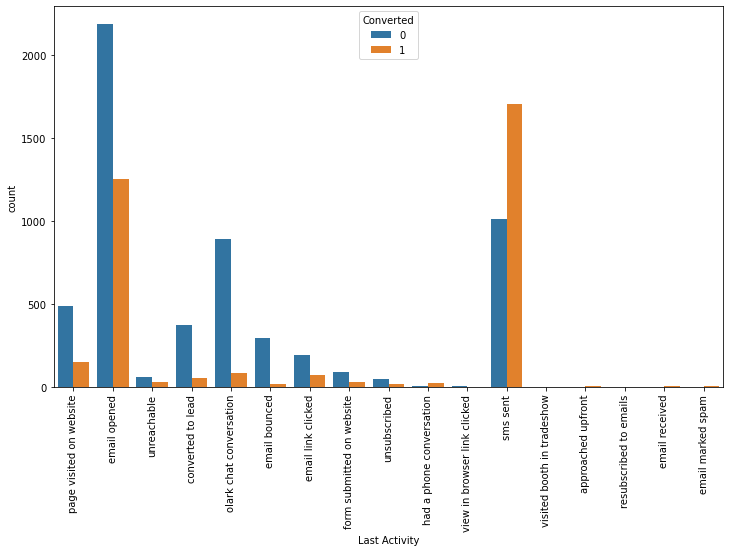

In [206]:
# plotting the count plot for 'Last Activity' column


plt.figure(figsize=(12,7))
Last_Activity = sns.countplot(leads['Last Activity'],hue = "Converted", data = leads)
Last_Activity.set_xticklabels(Last_Activity.get_xticklabels(),rotation = 90)
plt.show()

In [207]:
# Clubing the activities whose counts are less and naming as 'extra_activity'

leads['Last Activity'] = leads['Last Activity'].replace(['resubscribed to emails', 'view in browser link clicked', 
                                                       'visited booth in tradeshow', 'email marked spam',
                                                       'had a phone conversation','email received', 'approached upfront'], 'extra_activity')

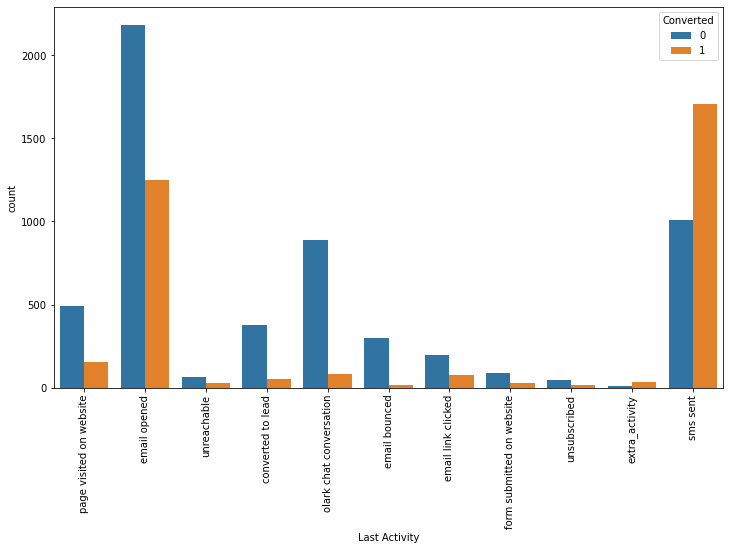

In [208]:
# plotting the count plot for 'Last Activity' column


plt.figure(figsize=(12,7))
Last_Activity = sns.countplot(leads['Last Activity'],hue = "Converted", data = leads)
Last_Activity.set_xticklabels(Last_Activity.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **From the above graph,we can say that Leads are most likely to have opened their email as their last activity.**
 - **Highest conversion rate is seen in 'sms sent'.**

In [209]:
# Checking the value counts of 'Last Notable Activity' column

leads['Last Notable Activity'].value_counts(dropna=False)

modified                        3267
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      45
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

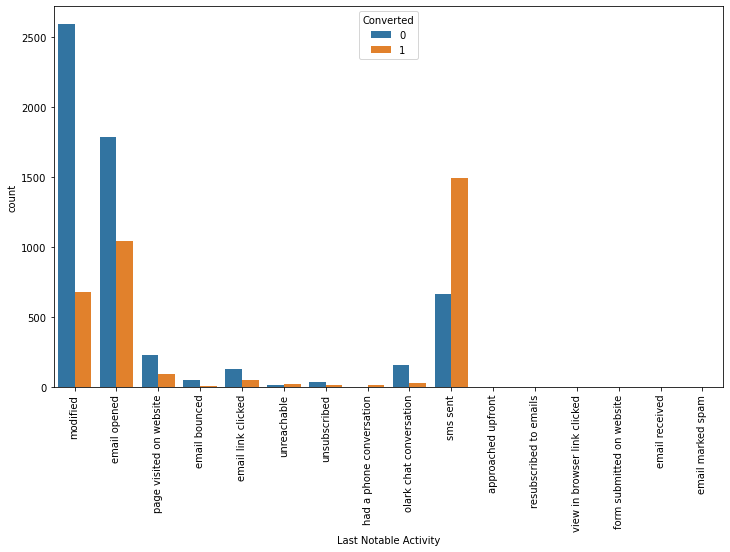

In [210]:
# plotting the count plot for 'Last Notable Activity' column


plt.figure(figsize=(12,7))
Last_Notable_Activity = sns.countplot(leads['Last Notable Activity'],hue = "Converted", data = leads)
Last_Notable_Activity.set_xticklabels(Last_Notable_Activity.get_xticklabels(),rotation = 90)
plt.show()

**Approach:**
 - **A large number of leads are not converted from 'modified', followed by 'e-mail opened'. However, the number of non-converted leads from 'sms sent' is considerably lower as compared to 'e-mail Opened' and 'modified'.**
 - **Most converted leads are from the 'sms sent' followed by 'e-mail opened' and then 'modified'.**


In [211]:
# Checking the value counts of 'A free copy of Mastering The Interview' column

leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

no     6186
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

**Approach:**
 - **From the data, we can see that most of the entries are 'no'. Thus, no assumption can be made.**

In [212]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Country                                        9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

**Approach:**
- **From the above analysis, we can see that most columns do not have a significant impact, so we can drop those columns.**

In [213]:

leads = leads.drop(['A free copy of Mastering The Interview','Search','Through Recommendations',
                    'Country','Newspaper','Digital Advertisement','Newspaper Article',
                    'What matters most to you in choosing a course','X Education Forums'],axis=1)

In [214]:
# Check the number of rows and columns in the dataframe

leads.shape

(9074, 10)

In [215]:
# Checking the summuary of the Numerical column in the dataframe

leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


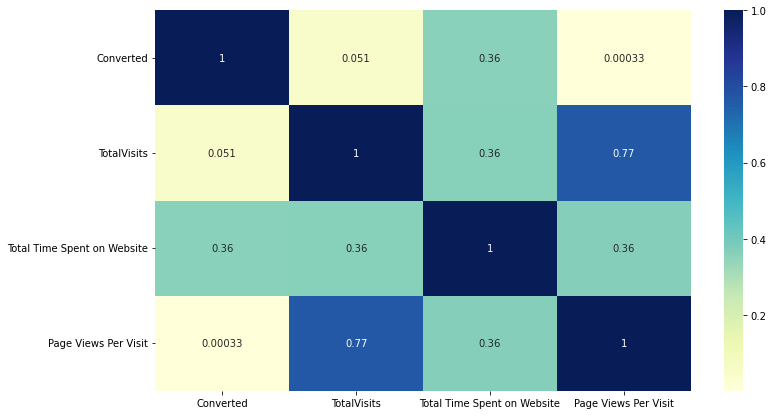

In [216]:
# Checking the correlation among varibles

plt.figure(figsize = (12,7))
sns.heatmap(leads.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [217]:
# Checking data type of the dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Converted                        9074 non-null   int64  
 3   TotalVisits                      9074 non-null   float64
 4   Total Time Spent on Website      9074 non-null   int64  
 5   Page Views Per Visit             9074 non-null   float64
 6   Last Activity                    9074 non-null   object 
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


In [218]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,api,olark chat,0,0.0,0,0.0,page visited on website,Unspecified,Unspecified,modified
1,api,organic search,0,5.0,674,2.5,email opened,Unspecified,Unspecified,email opened
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,business administration,email opened
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,media and advertising,modified
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,Unspecified,Unspecified,modified


## Step 3: Preparation of Data for Modeling

In [219]:
# Creating Dummy variables for Categorical variables

dummy_variable=pd.get_dummies(leads[['Lead Source', 'Lead Origin', 'Specialization','What is your current occupation','Last Activity','Last Notable Activity']], drop_first=True)
dummy_variable.head()

,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [220]:
# Merging the dummy variable dataset to the original dataset 

leads = pd.concat([leads, dummy_variable], axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,0,0.0,0,0.0,page visited on website,Unspecified,Unspecified,modified,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,0,5.0,674,2.5,email opened,Unspecified,Unspecified,email opened,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,business administration,email opened,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,media and advertising,modified,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,Unspecified,Unspecified,modified,...,0,0,1,0,0,0,0,0,0,0


In [221]:
# Dropping the unnecessary columns as we have already created dummy variables out of it

leads=leads.drop(['Lead Source', 'Specialization', 'Lead Origin','What is your current occupation','Last Activity','Last Notable Activity'], axis = 1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
# Shape of new dataset

leads.shape

(9074, 75)

In [223]:
# Column info of the new dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Converted                                                          9074 non-null   int64  
 1   TotalVisits                                                        9074 non-null   float64
 2   Total Time Spent on Website                                        9074 non-null   int64  
 3   Page Views Per Visit                                               9074 non-null   float64
 4   Lead Source_google                                                 9074 non-null   uint8  
 5   Lead Source_olark chat                                             9074 non-null   uint8  
 6   Lead Source_organic search                                         9074 non-null   uint8  
 7   Lead Source_others      

## Step 4: Splitting the Data into Training and Testing Sets


In [224]:
# Splitting the dataframe into Train and Test

np.random.seed(0)
leads_train, leads_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state=100)

In [225]:
leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0,2.0,397,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0,2.0,190,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,1,2.0,1380,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,1,5.0,1584,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [226]:
leads_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0,4.0,157,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,1,5.0,1513,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,2.0,74,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,1,0.0,0,0.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,8.0,164,6.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
# Checking shape of Train and Test dataframe

print('leads_train =',leads_train.shape)
print('leads_test =',leads_test.shape)

leads_train = (6351, 75)
leads_test = (2723, 75)


In [228]:
# Scaling the Numerical Data with StandardScaler

scaler = StandardScaler()

In [229]:
# Apply the scaler() to Numerical Data

leads_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(leads_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


In [230]:
# Checking the Numerical Data after scaling

leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0,-0.432779,-0.160255,-0.155018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0,-0.432779,-0.540048,-0.155018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,1,-0.432779,1.643304,-0.155018,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,1,0.643547,2.017593,0.122613,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [231]:
leads_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,4.153503e-17,2.774246e-16,3.950723e-17,0.320737,0.186427,0.127224,0.006613,0.051645,0.013384,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.486666,1.000079e+00,1.000079e+00,1.000079e+00,0.466797,0.389482,0.333250,0.081058,0.221328,0.114920,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,-1.150329e+00,-8.886503e-01,-1.265540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.915538e-01,-8.703028e-01,-7.102788e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-7.400339e-02,-4.354671e-01,-1.550176e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.435470e-01,8.002366e-01,5.834798e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.437423e+00,3.195502e+00,2.066027e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
# Conversion Rate of the target variable

converted = round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)
converted

37.86

**Approach:**
- **We have a churn rate of 37.86%**    

## Step 5: Building a Logistic Regression model

In [233]:
# Creating X and y train dataset for building a model

y_train = leads_train['Converted']
X_train = leads_train.drop(['Converted'],axis=1)

In [234]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,-0.432779,-0.160255,-0.155018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [235]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

### Using Logistic Regression function from SciKit Learn for making it suitable with RFE aslo known as Recursive Feature Elimination.

In [236]:
# Recursive feature elimination (RFE)

lr = LogisticRegression()
lr.fit(X_train, y_train)

# RFE with the output number of the variable equal to 15

rfe= RFE(lr,15)           
rfe= rfe.fit(X_train, y_train)

In [237]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Lead Source_google', False, 47),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 54),
 ('Lead Source_others', False, 50),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 55),
 ('Lead Source_welingak website', True, 1),
 ('Lead Origin_landing page submission', False, 2),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', True, 1),
 ('Specialization_banking, investment and insurance', False, 18),
 ('Specialization_business administration', False, 9),
 ('Specialization_e-business', False, 11),
 ('Specialization_e-commerce', False, 7),
 ('Specialization_finance management', False, 4),
 ('Specialization_healthcare management', False, 8),
 ('Specialization_hospitality management', False, 12),
 ('Specialization_human resource management', False, 3),
 ('Specialization_international business', False, 16),
 ('

In [238]:
# checking which columns has been approved

columns = X_train.columns[rfe.support_]
columns

Index(['Total Time Spent on Website', 'Lead Source_olark chat',
       'Lead Source_reference', 'Lead Source_welingak website',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Specialization_marketing management',
       'What is your current occupation_banking, investment and insurance',
       'What is your current occupation_operations management',
       'Last Activity_email bounced', 'Last Activity_extra_activity',
       'Last Activity_olark chat conversation',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable'],
      dtype='object')

In [239]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_others',
       'Lead Source_referral sites', 'Lead Origin_landing page submission',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism',
       'What is your c

In [240]:
# Creating a general formula for calculating VIF of variables

def calculateVIF(ds):
    vif = pd.DataFrame()
    vif['Features'] = ds.columns
    vif['VIF'] = [variance_inflation_factor(ds.values, i) for i in range(ds.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [241]:
# Creating a dataset with approved RFE

X_train_RFE = X_train[columns]

### Building Model Using Stats_Model:

### Model 1:

In [242]:
# Building 1st logistic regression model

X_train_sm_1 = sm.add_constant(X_train_RFE)
logreg_model1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res = logreg_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.5
Date:                Mon, 12 Sep 2022   Deviance:                       5693.1
Time:                        09:54:46   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.4126      0.052    -27.189      0.000      -1.514      -1.311
Total Time Spent on Website                                           1.1460      0.039     29.519      0.000       1.070       1.222
Lead Source_olark chat                                                1.3288      0.102     13.055      0.000       1.129       1.528
Lead Source_reference                                                 2.1919      0.958      2.288      0.022       0.314       4.070
Lead Source_welingak website                                          3.8233      1.184      3.229      0.001       1.503       6.144
Lead Origin_lead add form                                             2.0908      0.935      2.236      0.025       0.258       3.924
Lead Origin_lead import                                               1.8341      0.433      4.240      0.000       0.986       2.682
Specialization_marketing management                                   0.4529      0.112      4.043      0.000       0.233       0.672
What is your current occupation_banking, investment and insurance     0.3696      0.168      2.199      0.028       0.040       0.699
What is your current occupation_operations management                 0.3090      0.144      2.148      0.032       0.027       0.591
Last Activity_email bounced                                          -2.2300      0.367     -6.075      0.000      -2.949      -1.511
Last Activity_extra_activity                                          1.4460      0.518      2.790      0.005       0.430       2.462
Last Activity_olark chat conversation                                -1.4517      0.157     -9.270      0.000      -1.759      -1.145
Last Notable Activity_had a phone conversation                        2.0231      1.201      1.685      0.092      -0.330       4.376
Last Notable Activity_sms sent                                        1.5468      0.076     20.357      0.000       1.398       1.696
Last Notable Activity_unreachable                                     1.8971      0.453      4.191      0.000       1.010       2.784
=====================================================================================================================================
"""

In [243]:
# calculating VIF value for model 1

calculateVIF(X_train_RFE)

,Features,VIF
4,Lead Origin_lead add form,62.35
2,Lead Source_reference,47.95
3,Lead Source_welingak website,15.46
1,Lead Source_olark chat,1.56
10,Last Activity_extra_activity,1.55
12,Last Notable Activity_had a phone conversation,1.55
11,Last Activity_olark chat conversation,1.34
0,Total Time Spent on Website,1.27
13,Last Notable Activity_sms sent,1.20
6,Specialization_marketing management,1.05


### Model 2:

#### Removing the variable 'Lead Origin_lead add form' based on its High VIF

In [244]:
# Building 2nd logistic regression model

X_train_RFE = X_train_RFE.drop(['Lead Origin_lead add form'],axis = 1)
X_train_sm_2 = sm.add_constant(X_train_RFE)
logreg_model2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logreg_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.3
Date:                Mon, 12 Sep 2022   Deviance:                       5698.6
Time:                        09:54:46   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.4086      0.052    -27.154      0.000      -1.510      -1.307
Total Time Spent on Website                                           1.1435      0.039     29.499      0.000       1.068       1.219
Lead Source_olark chat                                                1.3266      0.102     13.051      0.000       1.127       1.526
Lead Source_reference                                                 4.2767      0.222     19.301      0.000       3.842       4.711
Lead Source_welingak website                                          5.9083      0.730      8.093      0.000       4.477       7.339
Lead Origin_lead import                                               1.8279      0.433      4.226      0.000       0.980       2.676
Specialization_marketing management                                   0.4550      0.112      4.065      0.000       0.236       0.674
What is your current occupation_banking, investment and insurance     0.3665      0.168      2.181      0.029       0.037       0.696
What is your current occupation_operations management                 0.3059      0.144      2.128      0.033       0.024       0.588
Last Activity_email bounced                                          -2.2326      0.367     -6.083      0.000      -2.952      -1.513
Last Activity_extra_activity                                          1.4421      0.518      2.784      0.005       0.427       2.457
Last Activity_olark chat conversation                                -1.4547      0.157     -9.293      0.000      -1.761      -1.148
Last Notable Activity_had a phone conversation                        2.0231      1.200      1.685      0.092      -0.330       4.376
Last Notable Activity_sms sent                                        1.5473      0.076     20.369      0.000       1.398       1.696
Last Notable Activity_unreachable                                     1.8926      0.453      4.182      0.000       1.006       2.779
=====================================================================================================================================
"""

In [245]:
# calculating VIF value for model 2

calculateVIF(X_train_RFE)

,Features,VIF
1,Lead Source_olark chat,1.56
9,Last Activity_extra_activity,1.55
11,Last Notable Activity_had a phone conversation,1.55
10,Last Activity_olark chat conversation,1.34
0,Total Time Spent on Website,1.27
12,Last Notable Activity_sms sent,1.20
2,Lead Source_reference,1.12
5,Specialization_marketing management,1.05
3,Lead Source_welingak website,1.04
7,What is your current occupation_operations man...,1.03


### Model 3:

#### Removing the variable 'Last Notable Activity_had a phone conversation' based on its High p-value

In [246]:
# Building 3rd logistic regression model

X_train_RFE = X_train_RFE.drop(['Last Notable Activity_had a phone conversation'],axis = 1)
X_train_sm_3 = sm.add_constant(X_train_RFE)
logreg_model3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
res = logreg_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.1
Date:                Mon, 12 Sep 2022   Deviance:                       5702.3
Time:                        09:54:46   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.4092      0.052    -27.166      0.000      -1.511      -1.308
Total Time Spent on Website                                           1.1428      0.039     29.494      0.000       1.067       1.219
Lead Source_olark chat                                                1.3230      0.102     13.015      0.000       1.124       1.522
Lead Source_reference                                                 4.2743      0.222     19.290      0.000       3.840       4.709
Lead Source_welingak website                                          5.9081      0.730      8.093      0.000       4.477       7.339
Lead Origin_lead import                                               1.8278      0.433      4.226      0.000       0.980       2.676
Specialization_marketing management                                   0.4595      0.112      4.110      0.000       0.240       0.679
What is your current occupation_banking, investment and insurance     0.3839      0.167      2.294      0.022       0.056       0.712
What is your current occupation_operations management                 0.3092      0.144      2.153      0.031       0.028       0.591
Last Activity_email bounced                                          -2.2321      0.367     -6.082      0.000      -2.951      -1.513
Last Activity_extra_activity                                          1.9940      0.437      4.563      0.000       1.138       2.851
Last Activity_olark chat conversation                                -1.4524      0.157     -9.279      0.000      -1.759      -1.146
Last Notable Activity_sms sent                                        1.5471      0.076     20.368      0.000       1.398       1.696
Last Notable Activity_unreachable                                     1.8919      0.452      4.182      0.000       1.005       2.779
=====================================================================================================================================
"""

In [247]:
# calculating VIF value for model 3

calculateVIF(X_train_RFE)

,Features,VIF
1,Lead Source_olark chat,1.56
10,Last Activity_olark chat conversation,1.34
0,Total Time Spent on Website,1.27
11,Last Notable Activity_sms sent,1.20
2,Lead Source_reference,1.12
5,Specialization_marketing management,1.05
3,Lead Source_welingak website,1.04
7,What is your current occupation_operations man...,1.03
6,"What is your current occupation_banking, inves...",1.02
8,Last Activity_email bounced,1.01


### Model 4:

#### Removing the variable 'What is your current occupation_operations management' based on its High p-value

In [248]:
# Building 4th logistic regression model

X_train_RFE = X_train_RFE.drop(['What is your current occupation_operations management'],axis = 1)
X_train_sm_4 = sm.add_constant(X_train_RFE)
logreg_model4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
res = logreg_model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.4
Date:                Mon, 12 Sep 2022   Deviance:                       5706.9
Time:                        09:54:46   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.3853      0.051    -27.428      0.000      -1.484      -1.286
Total Time Spent on Website                                           1.1436      0.039     29.522      0.000       1.068       1.220
Lead Source_olark chat                                                1.3086      0.101     12.925      0.000       1.110       1.507
Lead Source_reference                                                 4.2733      0.222     19.291      0.000       3.839       4.707
Lead Source_welingak website                                          5.8904      0.730      8.069      0.000       4.460       7.321
Lead Origin_lead import                                               1.8184      0.432      4.207      0.000       0.971       2.665
Specialization_marketing management                                   0.4365      0.111      3.922      0.000       0.218       0.655
What is your current occupation_banking, investment and insurance     0.3609      0.167      2.161      0.031       0.034       0.688
Last Activity_email bounced                                          -2.2381      0.367     -6.096      0.000      -2.958      -1.519
Last Activity_extra_activity                                          1.9859      0.436      4.553      0.000       1.131       2.841
Last Activity_olark chat conversation                                -1.4613      0.156     -9.343      0.000      -1.768      -1.155
Last Notable Activity_sms sent                                        1.5473      0.076     20.386      0.000       1.399       1.696
Last Notable Activity_unreachable                                     1.8754      0.452      4.150      0.000       0.990       2.761
=====================================================================================================================================
"""

In [249]:
# calculating VIF value for model 4

calculateVIF(X_train_RFE)

,Features,VIF
1,Lead Source_olark chat,1.55
9,Last Activity_olark chat conversation,1.34
0,Total Time Spent on Website,1.27
10,Last Notable Activity_sms sent,1.19
2,Lead Source_reference,1.12
5,Specialization_marketing management,1.05
3,Lead Source_welingak website,1.04
6,"What is your current occupation_banking, inves...",1.02
7,Last Activity_email bounced,1.01
4,Lead Origin_lead import,1.00


### Model 5:

#### Removing the variable 'What is your current occupation_banking, investment and insurance' based on its High p-value

In [250]:
# Building 5th logistic regression model

X_train_RFE = X_train_RFE.drop(['What is your current occupation_banking, investment and insurance'],axis = 1)
X_train_sm_5 = sm.add_constant(X_train_RFE)
logreg_model5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res = logreg_model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.8
Date:                Mon, 12 Sep 2022   Deviance:                       5711.5
Time:                        09:54:47   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3668      0.050    -27.530      0.000      -1.464      -1.270
Total Time Spent on Website               1.1436      0.039     29.530      0.000       1.068       1.220
Lead Source_olark chat                    1.2946      0.101     12.827      0.000       1.097       1.492
Lead Source_reference                     4.2797      0.221     19.322      0.000       3.846       4.714
Lead Source_welingak website              5.8727      0.730      8.044      0.000       4.442       7.304
Lead Origin_lead import                   1.7998      0.432      4.165      0.000       0.953       2.647
Specialization_marketing management       0.4179      0.111      3.766      0.000       0.200       0.635
Last Activity_email bounced              -2.2499      0.367     -6.131      0.000      -2.969      -1.531
Last Activity_extra_activity              2.0056      0.438      4.576      0.000       1.147       2.865
Last Activity_olark chat conversation    -1.4640      0.156     -9.361      0.000      -1.771      -1.157
Last Notable Activity_sms sent            1.5507      0.076     20.441      0.000       1.402       1.699
Last Notable Activity_unreachable         1.8783      0.453      4.146      0.000       0.990       2.766
=========================================================================================================
"""

In [251]:
# calculating VIF value for model 5

calculateVIF(X_train_RFE)

,Features,VIF
1,Lead Source_olark chat,1.55
8,Last Activity_olark chat conversation,1.34
0,Total Time Spent on Website,1.27
9,Last Notable Activity_sms sent,1.18
2,Lead Source_reference,1.11
5,Specialization_marketing management,1.05
3,Lead Source_welingak website,1.04
6,Last Activity_email bounced,1.01
4,Lead Origin_lead import,1.00
7,Last Activity_extra_activity,1.00


**Approach:**

- **Compared with other Model, Model 5 looks good, as the multicollinearity of the predictors appears to be very low, and all of the predictors have significant p-values.**
- **As a final model, we will consider this number as a good fit (unless the Test data metrics are significantly different).**


In [252]:
X_train_sm_5

,const,Total Time Spent on Website,Lead Source_olark chat,Lead Source_reference,Lead Source_welingak website,Lead Origin_lead import,Specialization_marketing management,Last Activity_email bounced,Last Activity_extra_activity,Last Activity_olark chat conversation,Last Notable Activity_sms sent,Last Notable Activity_unreachable
3009,1.0,-0.160255,0,0,0,0,0,0,0,0,0,0
1012,1.0,-0.540048,0,0,0,0,0,1,0,0,0,0
9226,1.0,-0.888650,1,0,0,0,0,0,0,0,0,0
4750,1.0,1.643304,0,0,0,0,1,0,0,0,1,0
7987,1.0,2.017593,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
367,1.0,0.595662,0,0,0,0,0,0,0,0,0,0
82,1.0,-0.888650,1,0,0,0,0,0,0,0,0,0
8199,1.0,-0.888650,0,1,0,0,0,0,0,0,1,0
7077,1.0,-0.046500,0,0,0,0,0,0,0,0,0,0


In [253]:
# Getting the predicted values on the train set

y_train_pred= res.predict(X_train_sm_5)

In [254]:
y_train_pred[:10]

3009    0.175069
1012    0.014282
9226    0.251899
4750    0.922802
7987    0.719200
1281    0.774208
2880    0.085120
4971    0.913811
7536    0.854110
1248    0.680909
dtype: float64

In [255]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17506947, 0.01428208, 0.25189902, 0.92280181, 0.71920011,
       0.77420817, 0.08512041, 0.91381104, 0.85410972, 0.68090855])

In [256]:
# Creating a dataframe with the actual and the predicted probabilities

y_train_final_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_final_pred['Prospect ID'] = y_train.index
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID
0,0,0.175069,3009
1,0,0.014282,1012
2,0,0.251899,9226
3,1,0.922802,4750
4,1,0.719200,7987


In [257]:
y_train_final_pred['Lead_Score'] = y_train_final_pred.Converted_prob.map( lambda x: round(x*100))

In [258]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_final_pred['Predicted'] = y_train_final_pred.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [259]:
# Let's see the head

y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted
0,0,0.175069,3009,18,0
1,0,0.014282,1012,1,0
2,0,0.251899,9226,25,0
3,1,0.922802,4750,92,1
4,1,0.719200,7987,72,1


In [260]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.Predicted)
print(confusion)

[[3399  506]
 [ 805 1641]]


In [261]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.Predicted))

0.7935758148323099


In [262]:
# Metrics beyond simply accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [263]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6708912510220768

In [264]:
# Let's see the specificity of our logistic regression model

TN / float(TN+FP)

0.8704225352112676

In [265]:
# Calculate false postive rate - predicting churn when customer does not have churned

FP / float(TN+FP)

0.1295774647887324

In [266]:
# positive predictive value 

TP / float(TP+FP)

0.7643223102002794

In [267]:
# Negative predictive value

TN / float(TN+FN)

0.8085156993339676

In [268]:
# Plotting the ROC Curve

def draw_roc(actual,probs):
    fpr,tpr,thresholds= metrics.roc_curve(actual,probs,drop_intermediate= False )
    auc_score= metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' % auc_score)
    plt.plot([0, 1],[0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [269]:
fpr,tpr,thresholds=metrics.roc_curve( y_train_final_pred.Converted, y_train_final_pred.Converted_prob, drop_intermediate=False)

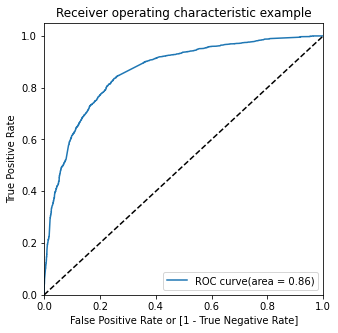

In [270]:
draw_roc(y_train_final_pred.Converted, y_train_final_pred.Converted_prob)

**Approach:**

- **We can see from the graph that the area under the curve is 0.86, which is not the best, but a good predictive model.**

### Finding Optimal Cutoff Point

In [271]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)] 
for i in numbers:
    y_train_final_pred[i] = y_train_final_pred.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.175069,3009,18,0,1,1,0,0,0,0,0,0,0,0
1,0,0.014282,1012,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.251899,9226,25,0,1,1,1,0,0,0,0,0,0,0
3,1,0.922802,4750,92,1,1,1,1,1,1,1,1,1,1,1
4,1,0.719200,7987,72,1,1,1,1,1,1,1,1,1,0,0


In [272]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cut_off_df= pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

nums= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    con_m1 = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred[i] )
    total_1 = sum(sum(con_m1))
    accuracy = (con_m1[0,0] + con_m1[1,1])/total_1
    
    speci=con_m1[0,0]/(con_m1[0,0]+con_m1[0,1])
    sensi=con_m1[1,1]/(con_m1[1,0]+con_m1[1,1])
    cut_off_df.loc[i] =[i,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.555818  0.971791  0.295262
0.2   0.2  0.723823  0.910466  0.606914
0.3   0.3  0.782711  0.834015  0.750576
0.4   0.4  0.790742  0.750204  0.816133
0.5   0.5  0.793576  0.670891  0.870423
0.6   0.6  0.786805  0.592396  0.908579
0.7   0.7  0.757676  0.457482  0.945711
0.8   0.8  0.731696  0.353639  0.968502
0.9   0.9  0.683357  0.196648  0.988220


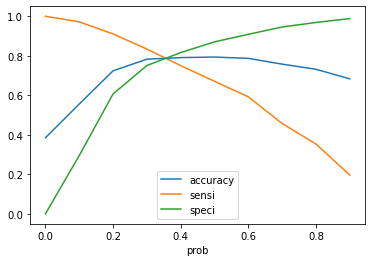

In [273]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Approach:**

- **From the above curve, optimum cutoff point is 0.37, so we will take ~0.4 as the cutoff probability.**

In [274]:
y_train_final_pred['final_Predicted']=y_train_final_pred.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.175069,3009,18,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.014282,1012,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.251899,9226,25,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.922802,4750,92,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.719200,7987,72,1,1,1,1,1,1,1,1,1,0,0,1


In [275]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.final_Predicted)

0.7907416154936231

In [276]:
confusion2 = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.final_Predicted )
confusion2

array([[3187,  718],
       [ 611, 1835]], dtype=int64)

In [277]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [278]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.750204415372036

In [279]:
# Let's see the specificity of our logistic regression model

TN / float(TN+FP)

0.8161331626120358

In [280]:
# Calculate false postive rate - predicting churn when customer does not have churned

FP / float(TN+FP)

0.18386683738796414

In [281]:
# positive predictive value 

TP / float(TP+FP)

0.7187622405013709

In [282]:
# Negative predictive value

TN / float(TN+FN)

0.8391258557135335

In [283]:
# Calculating the precision [TP / TP + FP]

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7643223102002794

In [284]:
# Calculating the Recall [TP / TP + FN]

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6708912510220768

### Precision and Recall score using the sklearn

In [285]:
from sklearn.metrics import precision_score, recall_score

In [286]:
# Calulating the precision score

precision_score(y_train_final_pred.Converted,y_train_final_pred.final_Predicted)

0.7187622405013709

In [287]:
# Calculating the Recall score

recall_score(y_train_final_pred.Converted, y_train_final_pred.final_Predicted)

0.750204415372036

In [288]:
# Plotting Precision Recall Curve

from sklearn.metrics import precision_recall_curve

In [289]:
y_train_final_pred.Converted,y_train_final_pred.final_Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    1
 Name: final_Predicted, Length: 6351, dtype: int64)

In [290]:
p,r,thresholds = precision_recall_curve(y_train_final_pred.Converted,y_train_final_pred.Converted_prob)

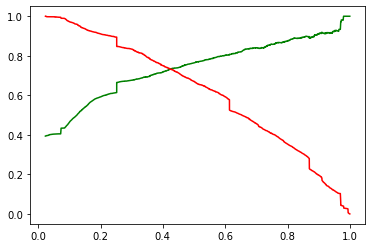

In [291]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

**Approach:**

- **From the above curve, we got the threshold value of 0.42.so we will take ~0.4.**

 ### When plotting the ROC curve and the graph based on Precision and Recall metrics, we get almost the same intersection value.

## Step 6: Model Evaluation

### Making predictions on the test set

In [292]:
# Creating X and y test dataset 

y_test = leads_test['Converted']
X_test = leads_test.drop(['Converted'],axis=1)

In [293]:
numcol = X_test.select_dtypes(include=['float64','int64']).columns
X_test[numcol] = scaler.fit_transform(X_test[numcol])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0.304501,-0.591008,0.998931,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.666261,1.894051,1.564920,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.419021,-0.743117,-0.133048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,-1.142542,-0.878732,-1.265027,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,1.751544,-0.578179,2.130909,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
# Using the columns which are used in Final Model (Model 5)

X_test_demo = X_train_sm_5.drop(['const'],axis=1)

X_test = X_test[X_test_demo.columns]

In [295]:
X_test_sm = sm.add_constant(X_test)

In [296]:
y_test_pred = res.predict(X_test_sm)

In [297]:
y_test_pred[:10]

3271    0.114789
1490    0.689806
7936    0.098262
4216    0.870791
3830    0.116288
1800    0.098634
6507    0.365693
4821    0.280412
4223    0.969488
4714    0.254043
dtype: float64

In [298]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [299]:
y_pred_1.head()

,0
3271,0.114789
1490,0.689806
7936,0.098262
4216,0.870791
3830,0.116288


In [300]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [301]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [302]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [303]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [304]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.114789
1,1,1490,0.689806
2,0,7936,0.098262
3,1,4216,0.870791
4,0,3830,0.116288


In [305]:
# Renaming the column 

y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_probability'})

In [306]:
# Rearranging the columns

cols = y_pred_final.columns.tolist()

cols_ordered = [cols[1]] + [cols[0]] + [cols[2]]

y_pred_final = y_pred_final[cols_ordered]

y_pred_final.head()

,Prospect ID,Converted,Converted_probability
0,3271,0,0.114789
1,1490,1,0.689806
2,7936,0,0.098262
3,4216,1,0.870791
4,3830,0,0.116288


- **We almost get the same intersection point value from plotting an ROC curve and a graph using Precision and Recall metrics in the train data set. So, we will use the cut off value as 0.4 for the test data set.**

In [307]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_probability.map( lambda x: round(x*100))

In [308]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score
0,3271,0,0.114789,11
1,1490,1,0.689806,69
2,7936,0,0.098262,10
3,4216,1,0.870791,87
4,3830,0,0.116288,12


In [309]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.4 else 0)

In [310]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score,final_Predicted
0,3271,0,0.114789,11,0
1,1490,1,0.689806,69,1
2,7936,0,0.098262,10,0
3,4216,1,0.870791,87,1
4,3830,0,0.116288,12,0


In [311]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.791039294895336

In [312]:
# Confusion metrics

confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion3

array([[1419,  315],
       [ 254,  735]], dtype=int64)

In [313]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7431749241658241

In [315]:
# Let's see the specificity of our logistic regression model

TN / float(TN+FP)

0.8183391003460208

In [316]:
# Calculate false postive rate - predicting churn when customer does not have churned

FP / float(TN+FP)

0.18166089965397925

In [317]:
# positive predictive value 

TP / float(TP+FP)

0.7

In [318]:
# Negative predictive value

TN / float(TN+FN)

0.8481769276748357

In [319]:
# Calulating the precision score

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7

In [320]:
# Calculating the Recall score

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7431749241658241

# Conclusion

### Comparision between Training and Testing dataset:
----------------------------------------------------------------------------
- **Optimum cutoff probability is consider as 0.4**
----------------------------------------------------------------------------
- **Train Set**
    - **Accuracy    : 79.1%**
    - **Sensitivity : 75.0%**
    - **Specificity : 81.6%**
----------------------------------------------------------------------------
- **Test Set**
    - **Accuracy    : 79.1%**
    - **Sensitivity : 74.3%**
    - **Specificity : 81.8%**
----------------------------------------------------------------------------
#### -->> It was found that the variables that mattered the most in the potential buyers are:

- **1. The Total Time Spent on Website**
- **2. When Specialization was marketing management.**
- **3. When the Lead Source was:**
    - **a. reference**
    - **b. welingak website**
    - **c. olark chat**
- **4. When the Last Activity was:**
    - **a. olark chat conversation**
    - **b. email bounced**
    - **c. extra_activity**
- **5. When the Lead Origin was lead.**
- **6. When the Last Notable Activity was:**
    - **a. sms sent**
    - **b. unreachable**
------------------------------------------------------------------------------------
- **This model seems to be very accurate in predicting conversion rates and seems stable when running on a TRAIN SET as well as a TEST SET. With this model, we should be able to give the CEO confidence in making good decisions.**